In [32]:
import plotly.io as pio
png_renderer = pio.renderers["png"]
png_renderer.width = 1300
png_renderer.height = 600

pio.renderers.default = "png"

In [2]:
import pandas as pd
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
bike = pd.read_excel('E:\\data\\bike sales.xlsx')
df= bike.copy()
df.head()

,Sales_Order #,Date,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,Sub_Category,Product_Description,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
0,261695,2021-12-01,1.0,December,2021,39,Adults (35-64),F,United States,California,Bikes,Mountain Bikes,"Mountain-200 Black, 46",4.0,1252,2295,4172,5008,9180
1,261695,2021-12-01,1.0,December,2021,44,Adults (35-64),M,United Kingdom,England,Bikes,Mountain Bikes,"Mountain-200 Silver, 42",1.0,1266,2320,1054,1266,2320
2,261697,2021-12-02,2.0,December,2021,37,Adults (35-64),M,United States,California,Bikes,Mountain Bikes,"Mountain-400-W Silver, 46",2.0,420,769,698,840,1538
3,261698,2021-12-02,2.0,December,2021,31,Young Adults (25-34),F,Australia,New South Wales,Bikes,Mountain Bikes,"Mountain-400-W Silver, 42",1.0,420,769,349,420,769
4,261699,2021-12-03,3.0,December,2021,37,Adults (35-64),F,United States,California,Bikes,Mountain Bikes,"Mountain-200 Black, 46",2.0,0,2295,2086,0,4590


In [4]:
df.shape

(89, 19)

In [5]:
df.columns

Index(['Sales_Order #', 'Date', 'Day', 'Month', 'Year', 'Customer_Age',
       'Age_Group', 'Customer_Gender', 'Country', 'State', 'Product_Category',
       'Sub_Category', 'Product_Description', 'Order_Quantity', ' Unit_Cost ',
       ' Unit_Price ', ' Profit ', ' Cost ', 'Revenue'],
      dtype='object')

In [6]:
for col in df.columns:
    print(col)
    print(df[col].nunique())
    print(df[col].unique())
    print('--- --- ---'*8)

Sales_Order #
87
[261695 261697 261698 261699 261700 261701 261702 261703 261704 261705
 261706 261707 261708 261709 261710 261711 261712 261713 261714 261715
 261716 261717 261718 261719 261720 261721 261722 261723 261724 261725
 261726 261727 261728 261729 261730 261731 261732 261733 261734 261735
 261736 261737 261738 261739 261740 261741 261742 261743 261744 261745
 261746 261747 261748 261749 261750 261751 261752 261753 261754 261755
 261756 261757 261758 261759 261760 261761 261762 261763 261764 261765
 261766 261767 261768 261769 261770 261771 261772 261773 261774 261775
 261776 261777 261778 261779 261780 261781 261782]
--- --- ------ --- ------ --- ------ --- ------ --- ------ --- ------ --- ------ --- ---
Date
24
['2021-12-01T00:00:00.000000000' '2021-12-02T00:00:00.000000000'
 '2021-12-03T00:00:00.000000000' '2021-12-04T00:00:00.000000000'
 '2021-12-05T00:00:00.000000000' '2021-12-06T00:00:00.000000000'
 '2021-12-07T00:00:00.000000000' '2021-12-08T00:00:00.000000000'
 '2021-

In [7]:
df = df.drop(['Sales_Order #','Product_Category','Sub_Category','Month','Year'],axis=1)

In [8]:
df.head(1)

,Date,Day,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Description,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
0,2021-12-01,1.0,39,Adults (35-64),F,United States,California,"Mountain-200 Black, 46",4.0,1252,2295,4172,5008,9180


In [9]:
df=df.rename(columns={'Revenue':'Total Price', 'Customer_Age':'Customer Age', 'Customer_Gender':'Gender',
                      'Product_Description':'Product Description', 'Order_Quantity':'Order Quantity',
                      ' Unit_Cost ':'Unit Cost', ' Unit_Price ':'Unit Price', ' Profit ':'Profit', ' Cost ':'Cost',
                     'Age_Group':'Age Group'})

In [10]:
df.head(1)

,Date,Day,Customer Age,Age Group,Gender,Country,State,Product Description,Order Quantity,Unit Cost,Unit Price,Profit,Cost,Total Price
0,2021-12-01,1.0,39,Adults (35-64),F,United States,California,"Mountain-200 Black, 46",4.0,1252,2295,4172,5008,9180


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89 entries, 0 to 88
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Date                 89 non-null     datetime64[ns]
 1   Day                  88 non-null     float64       
 2   Customer Age         89 non-null     int64         
 3   Age Group            88 non-null     object        
 4   Gender               89 non-null     object        
 5   Country              89 non-null     object        
 6   State                89 non-null     object        
 7   Product Description  88 non-null     object        
 8   Order Quantity       88 non-null     float64       
 9   Unit Cost            89 non-null     int64         
 10  Unit Price           89 non-null     int64         
 11  Profit               89 non-null     int64         
 12  Cost                 89 non-null     int64         
 13  Total Price          89 non-null     

In [12]:
df.isnull().sum()

Date                   0
Day                    1
Customer Age           0
Age Group              1
Gender                 0
Country                0
State                  0
Product Description    1
Order Quantity         1
Unit Cost              0
Unit Price             0
Profit                 0
Cost                   0
Total Price            0
dtype: int64

In [13]:
df[df.isnull().any(axis=1)]

,Date,Day,Customer Age,Age Group,Gender,Country,State,Product Description,Order Quantity,Unit Cost,Unit Price,Profit,Cost,Total Price
10,2021-12-05,NaN,42,Adults (35-64),M,Germany,Nordrhein-Westfalen,"Mountain-200 Black, 38",4.0,1252,2295,4172,5008,9180
15,2021-12-06,6.0,36,NaN,M,Australia,New South Wales,"Mountain-200 Black, 42",1.0,1252,2295,1043,1252,2295
21,2021-12-08,8.0,39,Adults (35-64),F,United States,Oregon,NaN,2.0,1252,2295,2086,2504,4590
22,2021-12-08,8.0,35,Adults (35-64),F,United States,California,"Mountain-500 Black, 42",NaN,295,540,245,0,0


In [14]:
df = df.dropna()
df.isnull().sum()

Date                   0
Day                    0
Customer Age           0
Age Group              0
Gender                 0
Country                0
State                  0
Product Description    0
Order Quantity         0
Unit Cost              0
Unit Price             0
Profit                 0
Cost                   0
Total Price            0
dtype: int64

In [15]:
df.describe()

,Day,Customer Age,Order Quantity,Unit Cost,Unit Price,Profit,Cost,Total Price
count,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000
mean,13.752941,34.023529,2.117647,1054.105882,1944.929412,1847.117647,2204.858824,4045.247059
std,6.391784,8.215804,1.238391,441.615595,791.130788,1390.563242,1724.334158,3127.112059
min,1.000000,17.000000,1.000000,0.000000,0.000000,245.000000,0.000000,0.000000
25%,10.000000,29.000000,1.000000,420.000000,2295.000000,1043.000000,1252.000000,2295.000000
50%,14.000000,35.000000,2.000000,1252.000000,2295.000000,1054.000000,1266.000000,2320.000000
75%,19.000000,38.000000,3.000000,1266.000000,2320.000000,2954.000000,3756.000000,6750.000000
max,24.000000,63.000000,4.000000,1912.000000,3400.000000,5908.000000,7592.000000,13500.000000


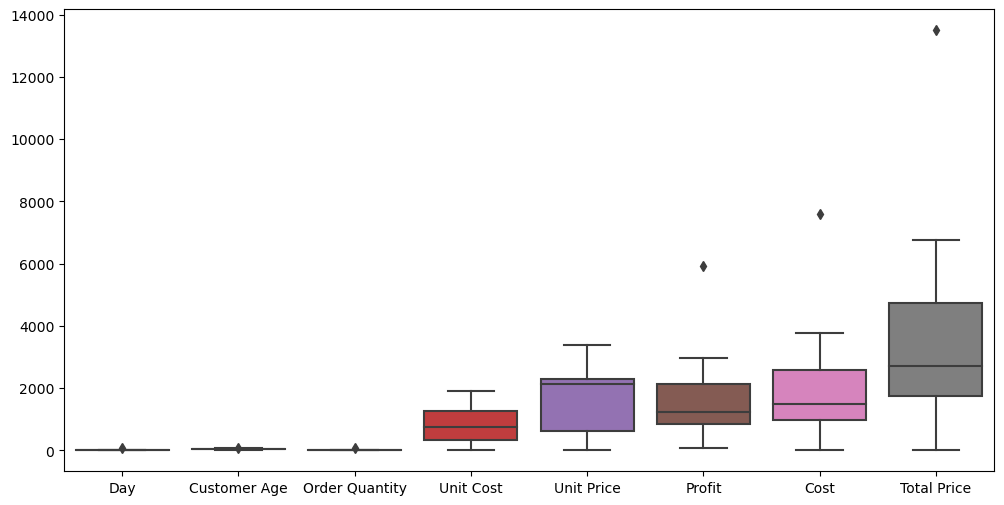

In [16]:
plt.figure(figsize=(12,6))
sns.boxplot(data=df.describe())
plt.show()

In [17]:
df['Cost'].nlargest()

65    7592
72    7592
20    5064
36    5064
56    5064
Name: Cost, dtype: int64

In [18]:
df['Profit'].nlargest()

65    5908
72    5908
20    4216
36    4216
56    4216
Name: Profit, dtype: int64

In [19]:
df['Total Price'].nlargest()

65    13500
72    13500
20     9280
36     9280
56     9280
Name: Total Price, dtype: int64

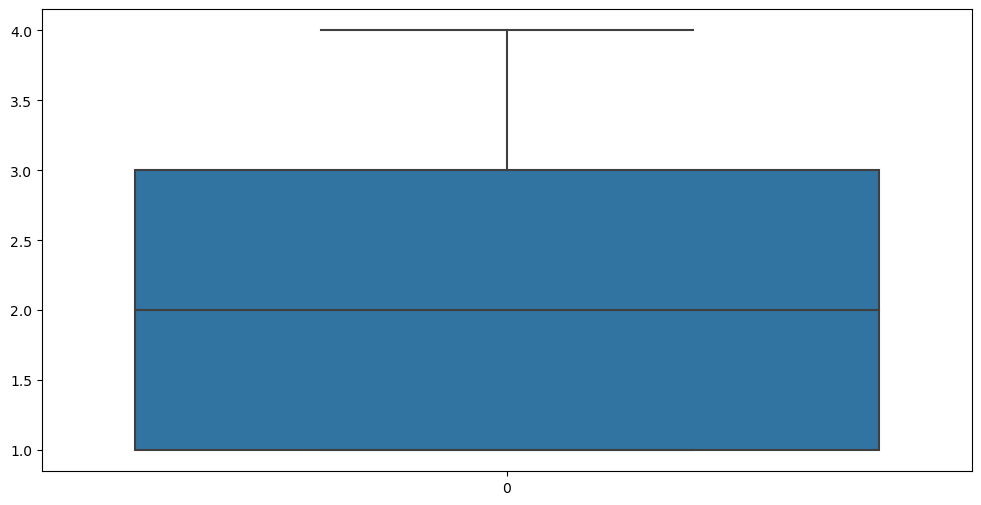

In [20]:
plt.figure(figsize=(12,6))
sns.boxplot(data=df['Order Quantity'])
plt.show()

In [21]:
df['Order Quantity'].nlargest()

0     4.0
8     4.0
9     4.0
17    4.0
19    4.0
Name: Order Quantity, dtype: float64

In [22]:
dff= df[(df['Total Price']<13000) & (df['Total Price']>0) & (df['Cost']<7000) & (df['Cost'] > 0) & (df['Profit']<5000) & (df['Unit Cost'] > 0)]
dff

,Date,Day,Customer Age,Age Group,Gender,Country,State,Product Description,Order Quantity,Unit Cost,Unit Price,Profit,Cost,Total Price
0,2021-12-01,1.0,39,Adults (35-64),F,United States,California,"Mountain-200 Black, 46",4.0,1252,2295,4172,5008,9180
1,2021-12-01,1.0,44,Adults (35-64),M,United Kingdom,England,"Mountain-200 Silver, 42",1.0,1266,2320,1054,1266,2320
2,2021-12-02,2.0,37,Adults (35-64),M,United States,California,"Mountain-400-W Silver, 46",2.0,420,769,698,840,1538
3,2021-12-02,2.0,31,Young Adults (25-34),F,Australia,New South Wales,"Mountain-400-W Silver, 42",1.0,420,769,349,420,769
5,2021-12-03,3.0,24,Youth (<25),F,United Kingdom,England,"Mountain-200 Black, 38",1.0,1252,2295,1043,1252,2295
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84,2021-12-22,22.0,41,Adults (35-64),M,Germany,Hessen,"Mountain-200 Silver, 38",1.0,1266,2320,1054,1266,2320
85,2021-12-23,23.0,30,Young Adults (25-34),F,United States,Oregon,"Mountain-200 Silver, 42",1.0,1266,2320,1054,1266,2320
86,2021-12-23,23.0,31,Young Adults (25-34),F,Canada,British Columbia,"Mountain-200 Black, 42",1.0,1252,2295,1043,1252,2295
87,2021-12-23,23.0,35,Adults (35-64),F,United States,California,"Mountain-500 Black, 42",1.0,295,540,245,295,540


In [23]:
for col in dff.columns:
    print(col)
    print(dff[col].nunique())
    print(dff[col].unique())
    print('--- --- ---'*8)

Date
23
['2021-12-01T00:00:00.000000000' '2021-12-02T00:00:00.000000000'
 '2021-12-03T00:00:00.000000000' '2021-12-05T00:00:00.000000000'
 '2021-12-06T00:00:00.000000000' '2021-12-07T00:00:00.000000000'
 '2021-12-08T00:00:00.000000000' '2021-12-09T00:00:00.000000000'
 '2021-12-10T00:00:00.000000000' '2021-12-11T00:00:00.000000000'
 '2021-12-12T00:00:00.000000000' '2021-12-13T00:00:00.000000000'
 '2021-12-14T00:00:00.000000000' '2021-12-15T00:00:00.000000000'
 '2021-12-16T00:00:00.000000000' '2021-12-17T00:00:00.000000000'
 '2021-12-18T00:00:00.000000000' '2021-12-19T00:00:00.000000000'
 '2021-12-20T00:00:00.000000000' '2021-12-21T00:00:00.000000000'
 '2021-12-22T00:00:00.000000000' '2021-12-23T00:00:00.000000000'
 '2021-12-24T00:00:00.000000000']
--- --- ------ --- ------ --- ------ --- ------ --- ------ --- ------ --- ------ --- ---
Day
23
[ 1.  2.  3.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17. 18. 19.
 20. 21. 22. 23. 24.]
--- --- ------ --- ------ --- ------ --- ------ --- 

In [24]:
dff.to_excel('E:\\data\\cleaned bike sales.xlsx',index = False)

<AxesSubplot:>

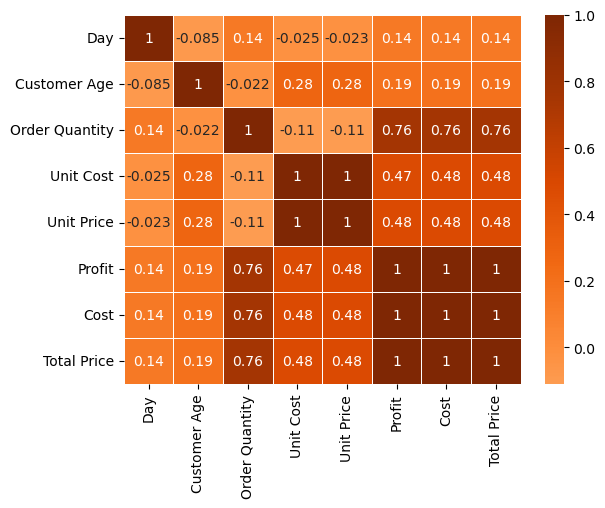

In [25]:
correlation_matrix= dff.corr()
sns.heatmap(correlation_matrix, annot= True, cmap='Oranges', center=0, linewidths=0.5)

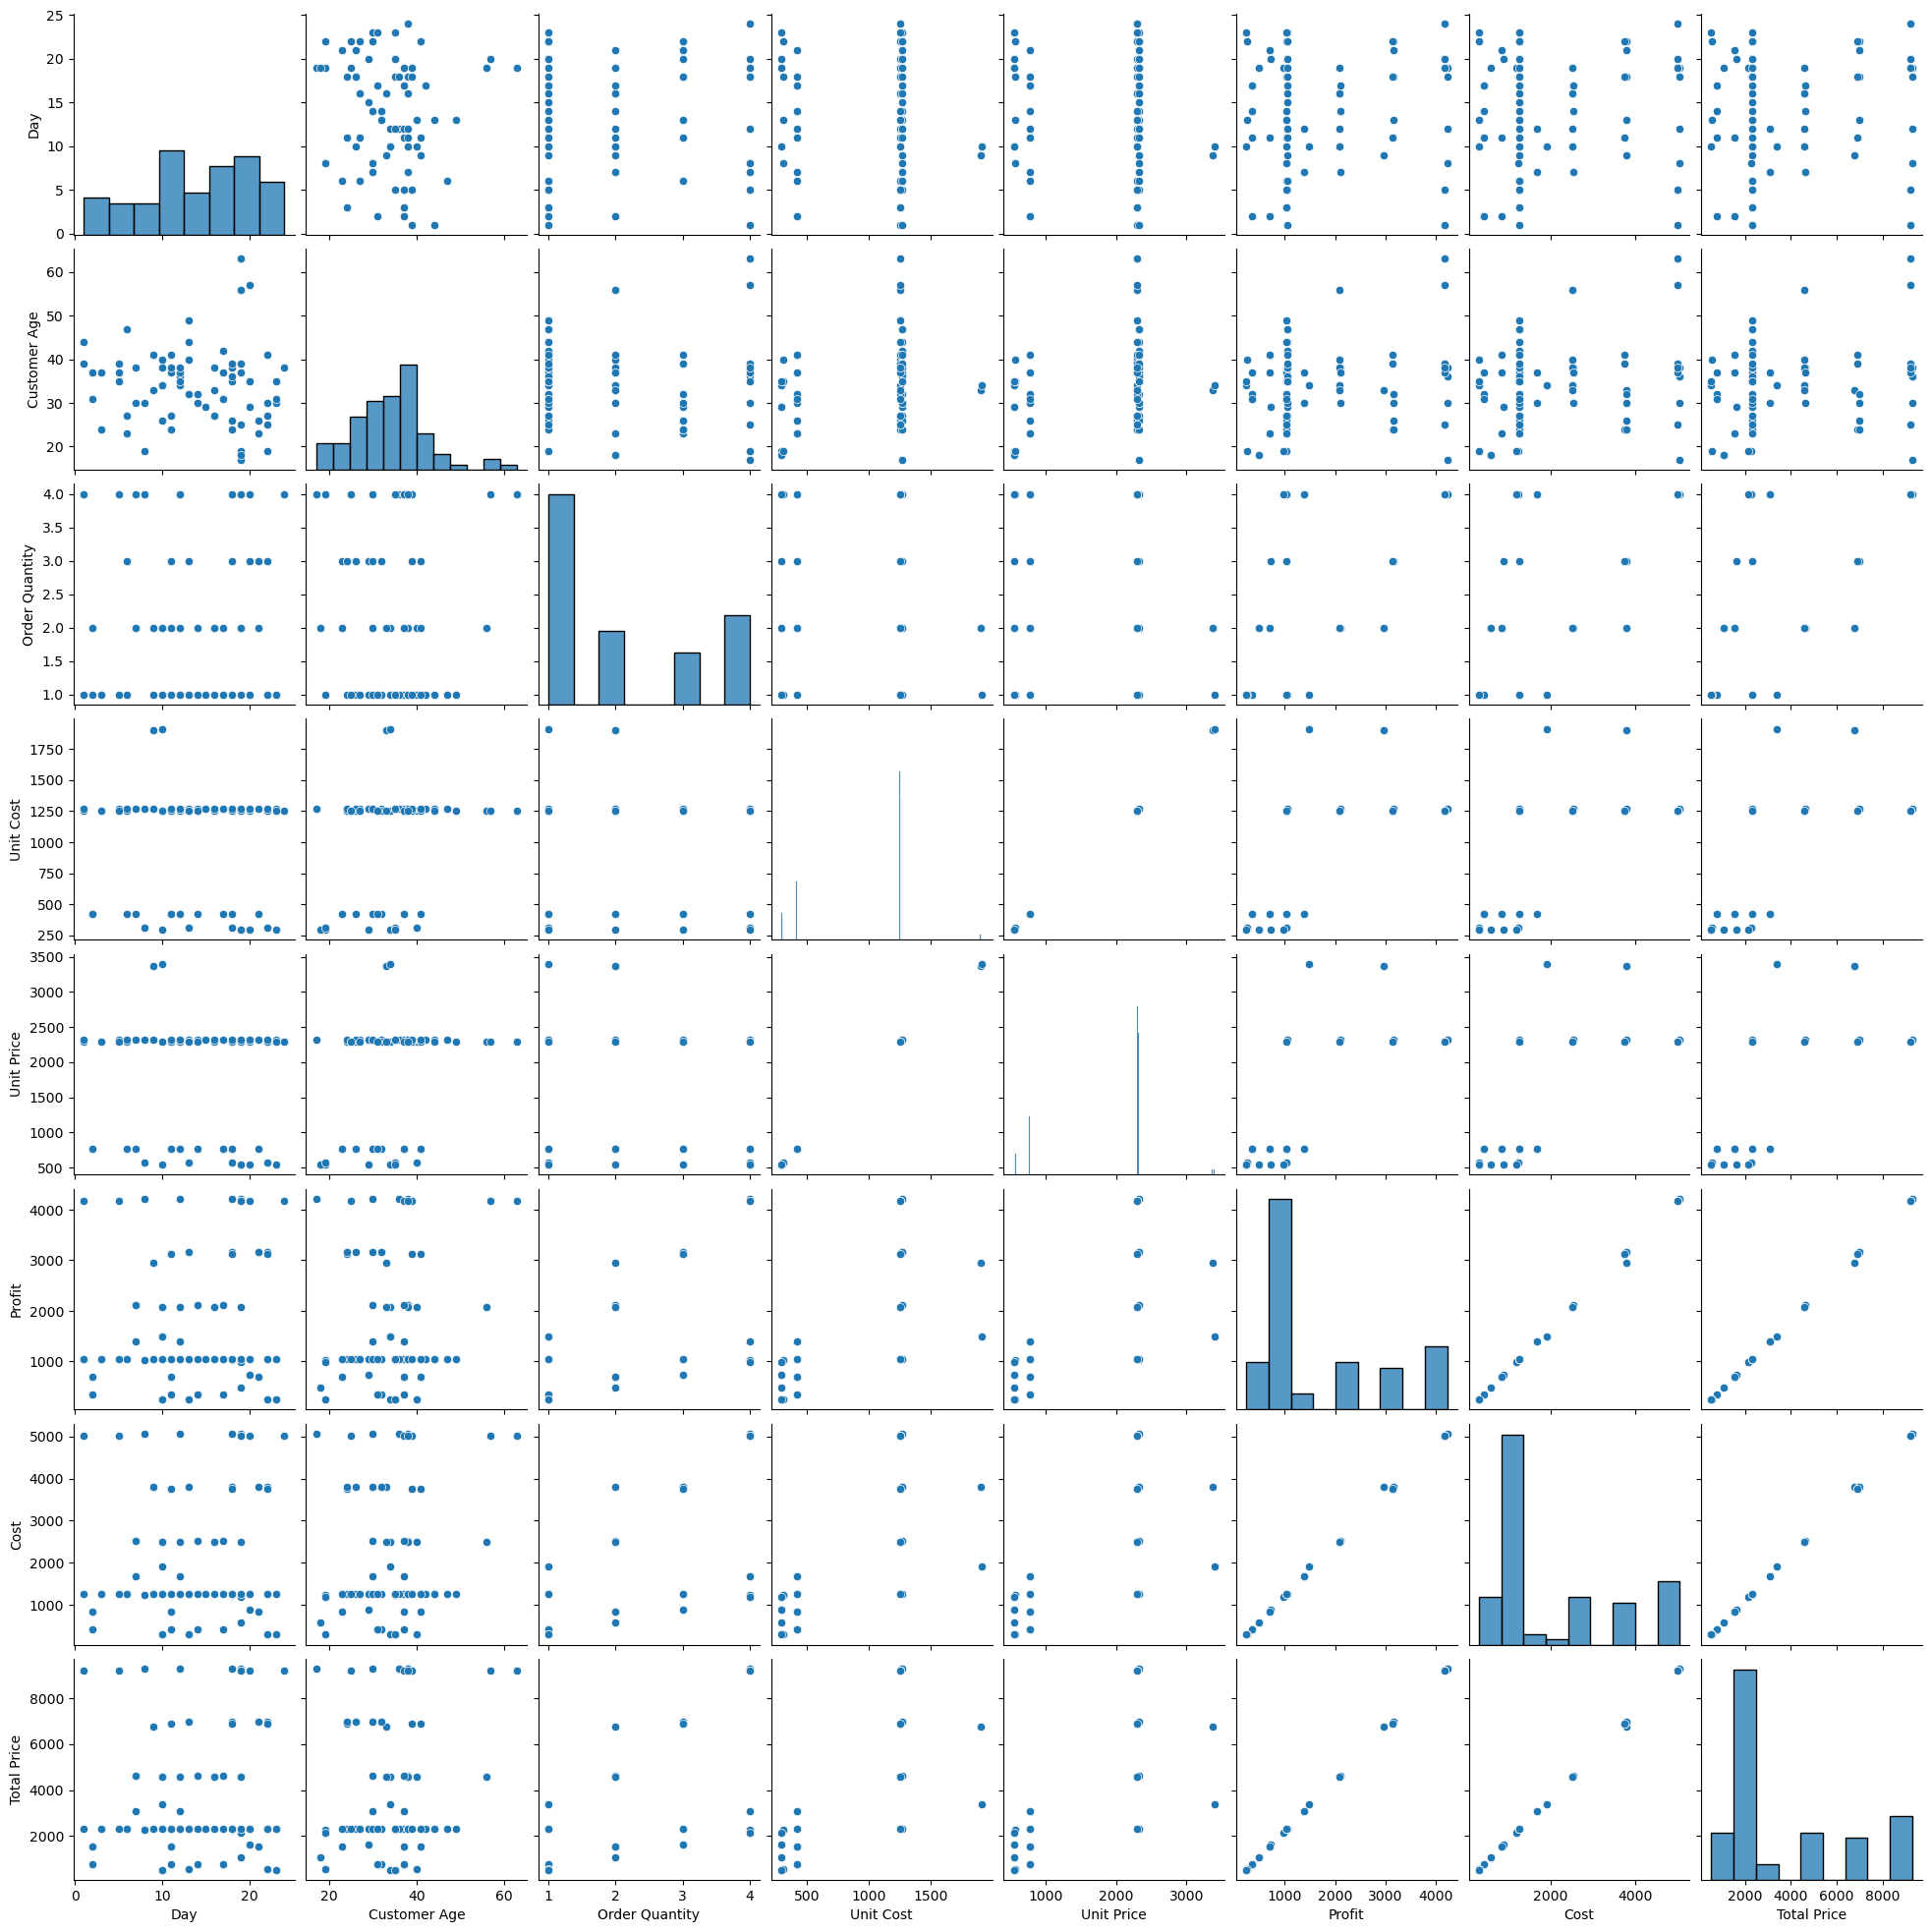

In [26]:
sns.pairplot(dff)
plt.show()

In [27]:
colors = {
    'orange': 'rgb(230, 81, 0)',
    'pink': 'rgb(173, 20, 87)',
    'blue': 'rgb(48, 63, 159)',
    'white':'rgb(255,255,255)'
}

In [28]:
dff['Age Group'].value_counts()
age_group = dff['Age Group'].value_counts().to_frame().reset_index()
age_group = age_group.rename(columns={'index': 'group', 'Age Group': 'total'})
age_group

,group,total
0,Adults (35-64),42
1,Young Adults (25-34),29
2,Youth (<25),10


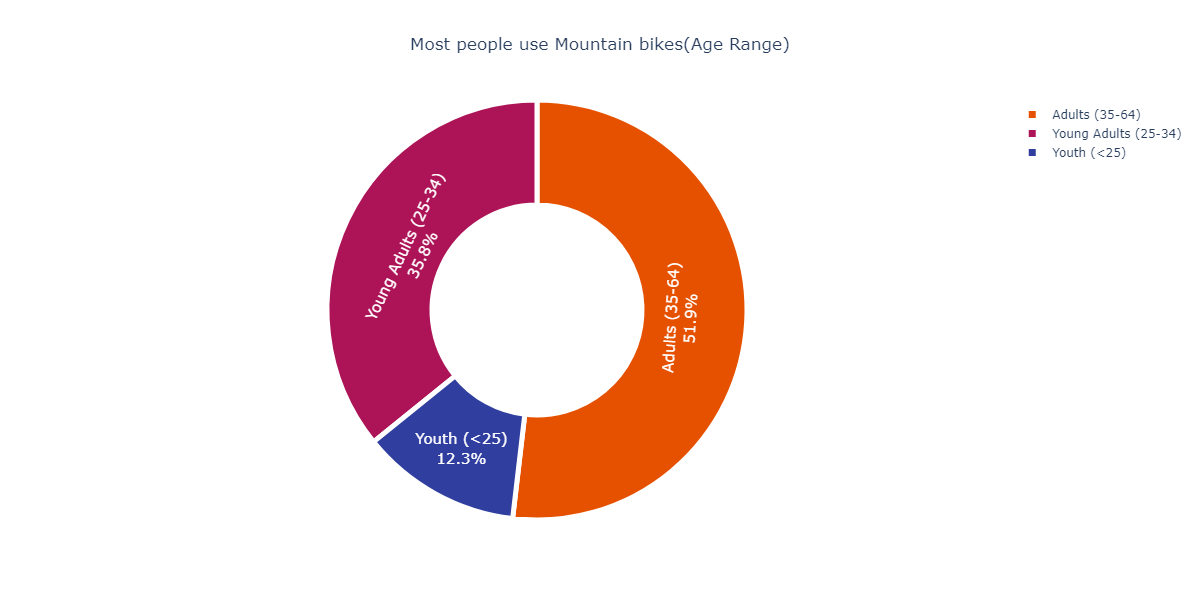

In [29]:
fig= go.Figure()

fig.add_trace(
    go.Pie(labels =age_group['group'], values= age_group['total'])
)

fig.update_traces(hoverinfo='label+value',textinfo='label+percent',
                  textfont_size=15,
                  marker=dict(colors=[colors['orange'],colors['pink'],colors['blue']],line=dict(color=colors['white'],width=5)),
                  hole=.5)

fig.update_layout(title_text='Most people use Mountain bikes(Age Range)',title_x=0.5)

fig.show()

In [30]:
dff.groupby('Gender')['Order Quantity'].sum()

Gender
F    91.0
M    75.0
Name: Order Quantity, dtype: float64

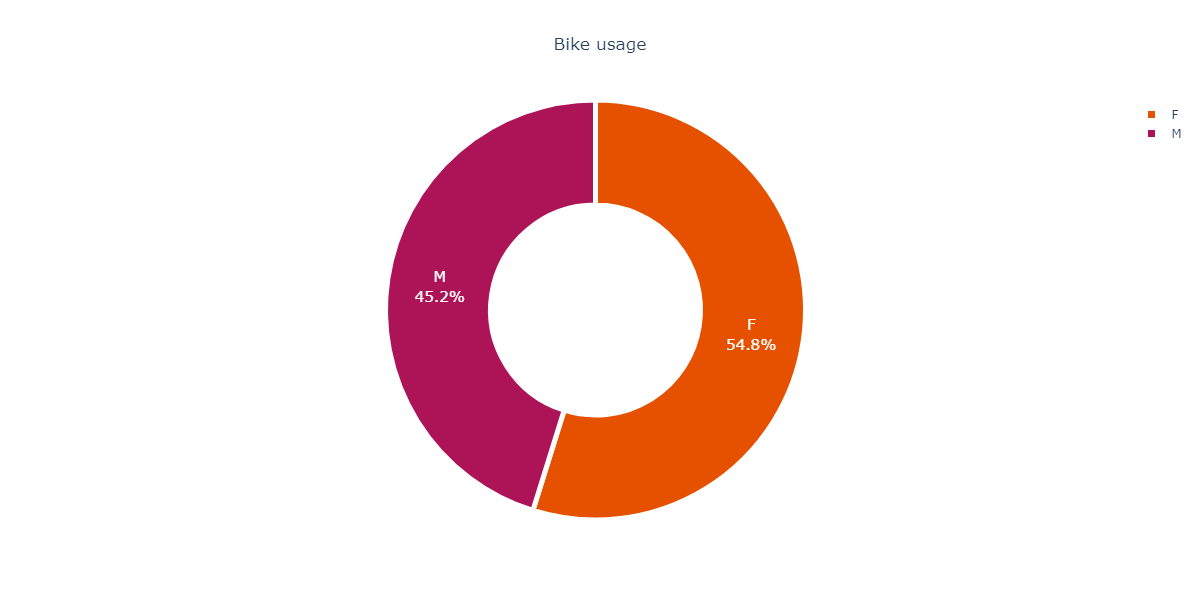

In [31]:
fig=go.Figure()

fig.add_trace(
    go.Pie(labels=dff.groupby('Gender')['Order Quantity'].sum().index, values=dff.groupby('Gender')['Order Quantity'].sum())
)

fig.update_traces(hoverinfo='label+value',textinfo='label+percent',
                  textfont_size=15,
                  marker=dict(colors=[colors['orange'],colors['pink'],colors['blue']],line=dict(color=colors['white'],width=5)),
                  hole=.5)
fig.update_layout(title_text='Bike usage', title_x=0.5)

fig.show()

In [31]:
dff['Country'].value_counts()

United States     27
Australia         24
United Kingdom     9
France             8
Canada             6
Germany            5
 United States     1
United States      1
Name: Country, dtype: int64

### Removing Space

In [32]:
dff['Country'] = dff['Country'].str.strip()
dff['Country'].value_counts()

C:\Users\USER\AppData\Local\Temp\ipykernel_8116\2449296788.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



United States     29
Australia         24
United Kingdom     9
France             8
Canada             6
Germany            5
Name: Country, dtype: int64

In [33]:
country_group=dff.groupby('Country')[['Order Quantity','Profit']].sum().reset_index().sort_values(by='Order Quantity')
country_group

,Country,Order Quantity,Profit
3,Germany,9.0,9464
1,Canada,11.0,9123
4,United Kingdom,14.0,9072
2,France,20.0,20981
0,Australia,54.0,41979
5,United States,58.0,51088


In [34]:
fig = go.Figure()

fig.add_trace(
    go.Bar(x=country_group['Country'],y=country_group['Order Quantity'],
           name ='Order Quentity',
           marker=dict(color=colors['pink']),
           text=country_group['Order Quantity'])
)
fig.add_trace(
    go.Bar(x=country_group['Country'],y=country_group['Profit'],
           name='Profit',
           marker=dict(color=colors['blue']),
           text=country_group['Profit'])
)

fig.update_traces(textposition='outside')

fig.update_layout(title_text='Most Mountain bike ordered country',title_x=.5,
                  barmode='group',
                  plot_bgcolor=colors['white'],
                  paper_bgcolor=colors['white'],
                  yaxis_type='log')

fig.update_xaxes(title_text='Country Name')
fig.update_yaxes(title_text='order quentity and profit')

fig.show()

In [35]:
country_group1 =dff.groupby(['Country','State'])[['Order Quantity','Profit']].sum().reset_index()
country_group1

,Country,State,Order Quantity,Profit
0,Australia,New South Wales,26.0,17312
1,Australia,Queensland,17.0,17786
2,Australia,South Australia,2.0,490
3,Australia,Victoria,9.0,6391
4,Canada,British Columbia,11.0,9123
5,France,Nord,4.0,4216
6,France,Seine (Paris),9.0,9387
7,France,Seine Saint Denis,3.0,3162
8,France,Seine et Marne,1.0,1054
9,France,Somme,3.0,3162


In [36]:
fig= go.Figure()

fig.add_trace(
    go.Bar(x=country_group1['State'],y=country_group1['Order Quantity'],
           marker=dict(color=colors['blue']),
           text=country_group1['Order Quantity'],
           hoverinfo='text',
           hovertemplate='Country: %{customdata[0]}<br>State: %{x}<br>Order Quantity: %{y}<br>Profit: %{customdata[1]}',
           customdata=country_group1[['Country', 'Profit']].values
          )
)

fig.update_traces(textposition='outside')

fig.update_layout(title_text='State wise order quanty of december', title_x=0.5,
                 plot_bgcolor=colors['white'],
                 paper_bgcolor=colors['white'])

fig.update_xaxes(title_text='State Name')
fig.update_yaxes(title_text='Order Quantity')

fig.show()

In [37]:
dff.head(1)

,Date,Day,Customer Age,Age Group,Gender,Country,State,Product Description,Order Quantity,Unit Cost,Unit Price,Profit,Cost,Total Price
0,2021-12-01,1.0,39,Adults (35-64),F,United States,California,"Mountain-200 Black, 46",4.0,1252,2295,4172,5008,9180


In [38]:
dff['Product Description'].unique()

array(['Mountain-200 Black, 46', 'Mountain-200 Silver, 42',
       'Mountain-400-W Silver, 46', 'Mountain-400-W Silver, 42',
       'Mountain-200 Black, 38', 'Mountain-200 Silver, 38',
       'Mountain-400-W Silver, 38', 'Mountain-500 Silver, 42',
       'Mountain-100 Black, 38', 'Mountain-200 Black, 42',
       'Mountain-500 Black, 40', 'Mountain-100 Silver, 44',
       'Mountain-500 Silver, 40', 'Mountain-200 Silver, 46',
       'Mountain-500 Black, 44', 'Mountain-500 Black, 52',
       'Mountain-500 Black, 42'], dtype=object)

In [39]:
dff['Product Description'].nunique()

17

In [40]:
bike = dff.groupby('Product Description')['Unit Price','Order Quantity','Unit Cost'].sum().reset_index()
bike

C:\Users\USER\AppData\Local\Temp\ipykernel_8116\2809690940.py:1: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



,Product Description,Unit Price,Order Quantity,Unit Cost
0,"Mountain-100 Black, 38",3375,2.0,1898
1,"Mountain-100 Silver, 44",3400,1.0,1912
2,"Mountain-200 Black, 38",27540,23.0,15024
3,"Mountain-200 Black, 42",13770,15.0,7512
4,"Mountain-200 Black, 46",32130,30.0,17528
5,"Mountain-200 Silver, 38",32480,25.0,17724
6,"Mountain-200 Silver, 42",20880,15.0,11394
7,"Mountain-200 Silver, 46",9280,10.0,5064
8,"Mountain-400-W Silver, 38",1538,6.0,840
9,"Mountain-400-W Silver, 42",2307,5.0,1260


In [41]:
fig= go.Figure()

fig.add_trace(
    go.Bar(x=bike['Product Description'],y=bike['Order Quantity'],
           name='Order Quantity',
           text=bike['Order Quantity'],
           marker=dict(color=colors['orange']))
)

fig.update_traces(textposition='outside')

fig.update_layout(title_text='Most ordered bike models',title_x=0.5,
                 plot_bgcolor=colors['white'],
                 paper_bgcolor=colors['white'])

fig.update_xaxes(title_text='Bike Models')
fig.update_yaxes(title_text='Order Quantity')


fig.show()

In [42]:
fig= go.Figure()

fig.add_trace(
    go.Bar(x=bike['Product Description'],y=bike['Unit Price'],
           name='Unit Price',
           text=bike['Unit Price'],
           marker=dict(color=colors['blue']))
)

fig.update_traces(textposition='outside')

fig.update_layout(title_text='Most ordered bike models',title_x=0.5,
                 plot_bgcolor=colors['white'],
                 paper_bgcolor=colors['white']
                 )

fig.update_xaxes(title_text='Bike Models')
fig.update_yaxes(title_text='Unit Price')


fig.show()

In [43]:
fig= go.Figure()

fig.add_trace(
    go.Bar(x=bike['Product Description'],y=bike['Unit Cost'],
           name='Unit Price',
           text=bike['Unit Cost'],
           marker=dict(color=colors['pink']))
)

fig.update_traces(textposition='outside')

fig.update_layout(title_text='Most ordered bike models',title_x=0.5,
                 plot_bgcolor=colors['white'],
                 paper_bgcolor=colors['white']
                 )

fig.update_xaxes(title_text='Bike Models')
fig.update_yaxes(title_text='Unit Cost')


fig.show()

In [44]:
fig=go.Figure()

fig.add_trace(
    go.Scatter(x=dff['Product Description'].unique(),y=dff['Unit Cost'],
               name='Unit Cost',
               mode='lines+markers',
               line=dict(color=colors['blue']))
)

fig.add_trace(
    go.Scatter(x=dff['Product Description'].unique(),y=dff['Profit'],
               name='Profit',
               mode='lines+markers',
               line=dict(color=colors['orange']))
)


fig.update_layout(title_text='Unit cost vs Profit',title_x=0.5,
                  plot_bgcolor=colors['white'],
                  paper_bgcolor=colors['white'])

fig.show()